<h4>Import Libraries</h4>

In [17]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

<h4>Load the MNIST dataset and split into training and test sets</h4>

Each pixel in the MNIST dataset has a value between 0 (black) and 255 (white).

Neural networks work better when inputs are small numbers, usually between 0 and 1 so divide the pixel values by 255.0 to get numbers representing grey which fall between 0 and 1.

In [18]:
#Loading the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Preprocess the data
x_train = x_train / 255.0  # Normalize to 0-1
x_test = x_test / 255.0

MNIST images are 28x28 grayscale images.

CNNs expect input in this shape: (height, width, channels)

Channels: 1 for grayscale, 3 for RGB

The -1 lets NumPy automatically figure out the number of samples (e.g., 60 for training)

In [19]:
#Reshape for CNN input (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

<h4>Model Development</h4>

The model is sequential, meaning that the layers are stacked one after the other — a straight-through network.
Non-linearity is essential as Without non-linearity, the neural network would just be doing a series of linear operations — which means no matter how deep the model is, it could only learn linear patterns. That severely limits what it can learn.

In [20]:
#Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

<h4>Compiling and training the Model</h4>
Here, the algorithm to use for optimization is set, what kind of loss to minimize, and what metrics to track.”

Adam is a smart optimization algorithm which adjusts learning rates automatically while training. It helps your model learn faster and more reliably than plain gradient descent which makes it the most popular choice for training neural networks.

loss='sparse_categorical_crossentropy'
This is the loss function (aka cost function) that tells the model how wrong its predictions are and helps it learn from mistakes.

sparse_categorical_crossentropy is used for Multi-class classification i.e When the labels are integers (e.g., 0–9 for digits) instead of one-hot encoded vectors

In [21]:

#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

#Save the trained model to a file
model.save("digit_model.h5")
print("Model saved as digit_model.h5")


Epoch 1/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.1642 - accuracy: 0.9506 - val_loss: 0.0730 - val_accuracy: 0.9772
Epoch 2/5
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0539 - accuracy: 0.9836 - val_loss: 0.0509 - val_accuracy: 0.9858
Epoch 3/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0371 - accuracy: 0.9882 - val_loss: 0.0448 - val_accuracy: 0.9867
Epoch 4/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0284 - accuracy: 0.9903 - val_loss: 0.0450 - val_accuracy: 0.9872
Epoch 5/5
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0200 - accuracy: 0.9935 - val_loss: 0.0363 - val_accuracy: 0.9890
Model saved as digit_model.h5


<h4>Parameter Finetuning</h4>
Epochs allows the model to pass through the data and learn from it. Setting multiple epochs means that the model is allowed more time to read the data and learn from it. However, too many epoch will result in = overfitting. Where the model now memorizes the data instead of generalizing.

Usually accuracy and loss are used to decide when to stop adding epochs. For example, If val_loss starts increasing while training loss keeps dropping.That means the model is memorizing the training data. Its best to stop and keep the best model before overfitting starts.

I observed that increasing the unseen data to 20% reduces the loss and validation loss and keeps them balanced. 

313/313 [==============================] - 2s 5ms/step - loss: 0.0354 - accuracy: 0.9891

Test accuracy: 0.99


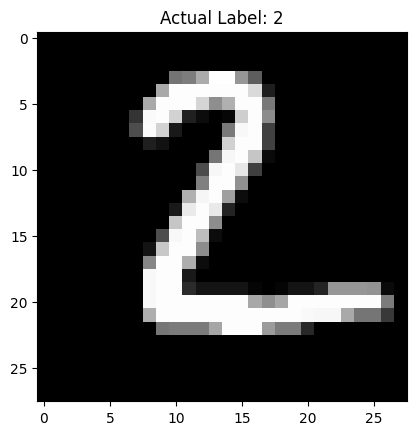

1/1 [==============================] - 0s 90ms/step
Predicted digit: 2


In [22]:
#Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.2f}")

#Predict a sample digit
index = 1  # pick any digit from test set to be predicted by the model.
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title("Actual Label: {}".format(y_test[index]))
plt.show()

prediction = model.predict(np.expand_dims(x_test[index], axis=0))
print(f"Predicted digit: {np.argmax(prediction)}")